In [1]:
#Data Maniplulation
import pandas as pd
import numpy as np
import math

#Data Visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split

#Data Transformations
from sklearn.preprocessing import MinMaxScaler

#Data imbalance
from imblearn.over_sampling import KMeansSMOTE

#Model Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Feature Engineering
from sklearn.feature_selection import mutual_info_classif

#Model Selection hyperparameter tuning
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

#Model Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

<h2 style = "text-align:center"> INTRODUCTION  </h2>
<p>This notebook contains an experimental investigation of Bias in a model using a Heart Disease predicting model as a case study. The model was developed with the Support Vector Machine Classifier from Sklearn</p>

<h2 style = "text-align:center"> FEATURE DESCRIPTION  </h2>
<p> Below are the descriptions of the features of the dataset: </p>
<ol> 
    <li>Age:<br>Patient's Age in years (Numeric)  </li>
    <li>Sex:<br> Patient's Gender Male as 1 Female as 0 (Nominal)</li>
    <li>Chest pain type:<br>Type of chest pain categorized into 1 typical, 2 typical angina, 3 non-anginal pain, 4 asymptomatic (Categorical) </li>
    <li>Resting bps: <br>Level of blood pressure at resting mode in mm/HG (Numerical) </li>
    <li>Cholesterol:<br>Serum cholestrol in mg/dl (Numeric </li>
    <li>Fasting blood sugar: <br> Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false</li>
    <li>Resting ecg:<br> result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy </li>
    <li>Max heart rate:<br> Maximum heart rate achieved (Numeric) </li>
    <li>Exercise angina:<br> Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal) </li>
    <li>Oldpeak:<br> Exercise induced ST-depression in comparison with the state of rest (Numeric) </li>
    <li>ST slope: <br> ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping</li>
    <li>Target:<br> Heart Risk 1 means heart disease 0 means normal </li>
</ol>

<h2 style = "text-align:center"> DATA IMPORTATION AND STRUCTURAL INVESTIGATION </h2>

In [2]:
#Read Data 
main_data = pd.read_csv("/kaggle/input/heart-disease/heart_statlog_cleveland_hungary_final.csv")
main_data.head()

#set the maximum column displayed to the number of features of the dataframe
pd.set_option("display.max_columns",main_data.shape[1])
main_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
# check basic info
#shape
print("======shape ====== \n", main_data.shape)

#datatypes
print("\n======data types ====== \n" , main_data.dtypes)

#number of unique values
print("\n======number of unique values ====== \n" , main_data.nunique())

#missing values and their percentage
print("\n======Number of missing values with percentage ====== \n")
for feature in main_data.columns:
  m_val = main_data[feature].isna().sum()
  percent_na = round(((m_val*100)/main_data.shape[0]),1)
  print(f" {feature}: {m_val} ({percent_na})%")


======shape ====== 
 (1190, 12)

======data types ====== 
 age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

======number of unique values ====== 
 age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

======Number of missing values with percentage ====== 

 age: 0 (0.0)%
 sex: 0 (0.0)%
 chest pain type: 0 (0.0)%
 resting bp s: 0 (0.0)%
 cholesterol: 0 (0.0)%
 fasting blood su

The data contains no missing values. 

<h2 style = "text-align:center"> EXPLORATORY DATA ANALYSIS </h2>

Create lists of categorical and numeric features

In [4]:
#create lists of categorical and numeric features
cat_type = ["sex", "chest pain type","fasting blood sugar", "resting ecg","exercise angina","ST slope","target"]
num_type = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]


<h4> Statistical Analysis of Numeric Features</h4>

In [5]:

#Create DataFrame from numerical feature descriptions
num_stats = main_data[num_type].describe().T #Transpose the table so we have column names as index and the stats as the columns

#get the interquartile range from the difference of 75% and 25%
num_stats["iqr"] = num_stats["75%"]-num_stats["25%"]

#get the normal range, max-min
num_stats["range"] = num_stats["max"]-num_stats["min"]

#rename the 50% to median
num_stats= num_stats.rename(columns={"50%":"median"})
num_stats.head(15)

,count,mean,std,min,25%,median,75%,max,iqr,range
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0,13.00,49.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0,20.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0,81.75,603.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0,39.00,142.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2,1.60,8.8


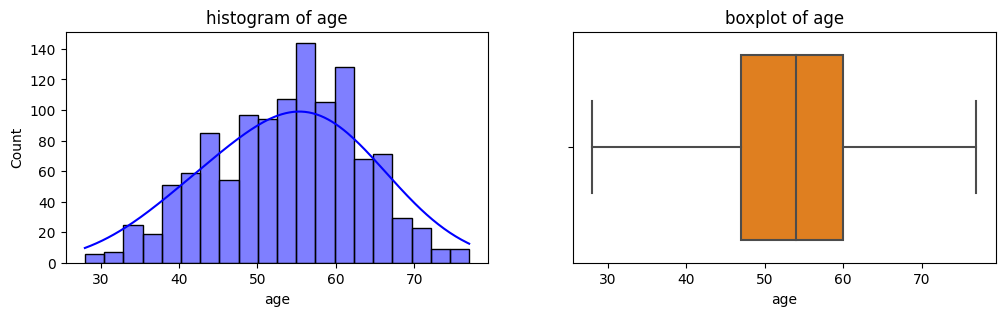

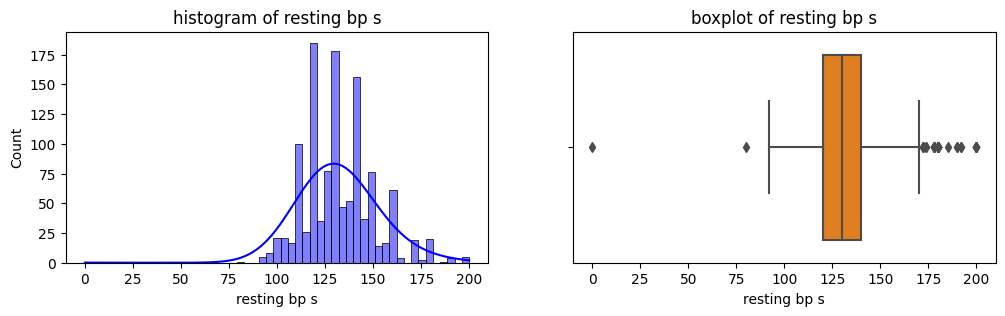

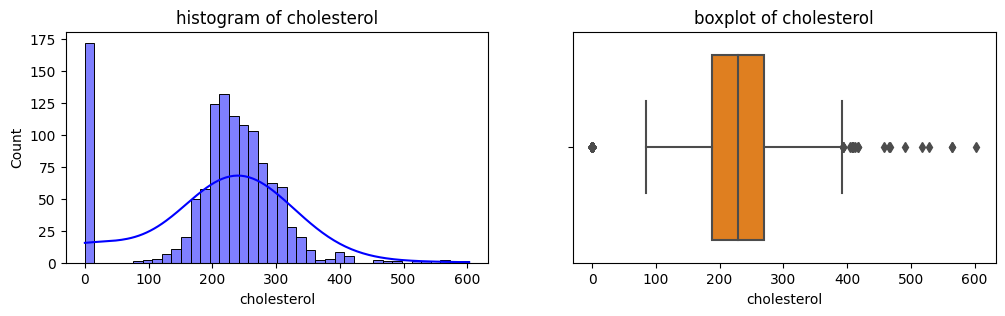

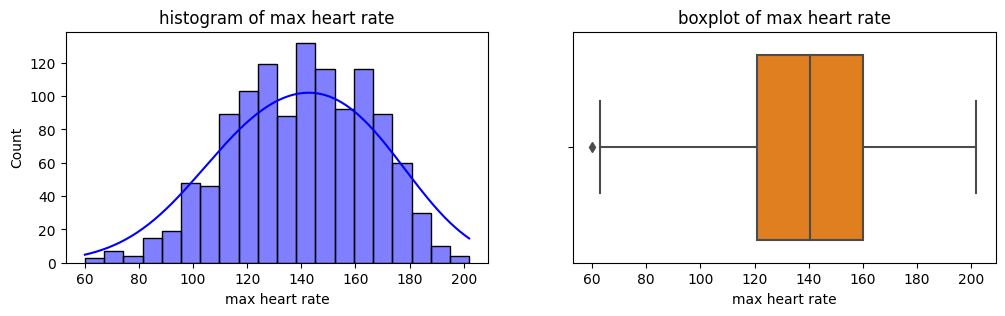

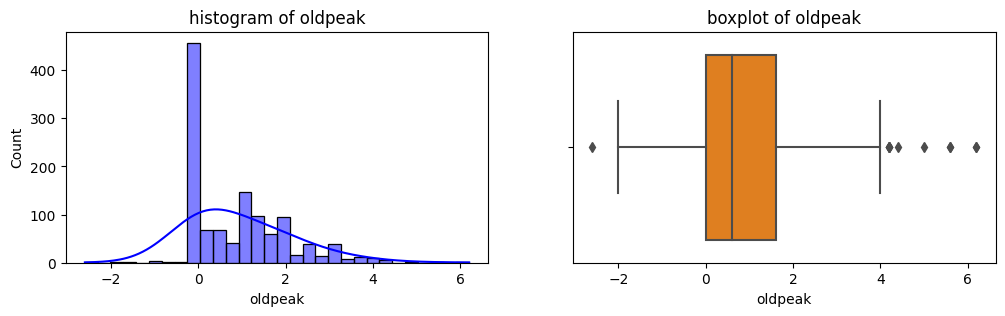

In [6]:
#hostogram plot
for feature in main_data[num_type]:
  fig, axs = plt.subplots(1,2,figsize=(12,3))
  #histogram
  sns.histplot(main_data[feature], kde=True, kde_kws ={"bw_adjust":3}, ax=axs[0], color="Blue")
  axs[0].set_title(f"histogram of {feature}")
  #boxplot
  sns.boxplot(x=main_data[feature],ax=axs[1],palette="Set1_r")
  axs[1].set_title(f"boxplot of {feature}")
  plt.show()

In the above histogram and boxplot of each feature, we can observe outliers in all except the age. The outliers requiring further information are the entries corresponding to zero in the "resting bps" and "cholesterol" columns

<h4> Analysis of Categorical features</h4>

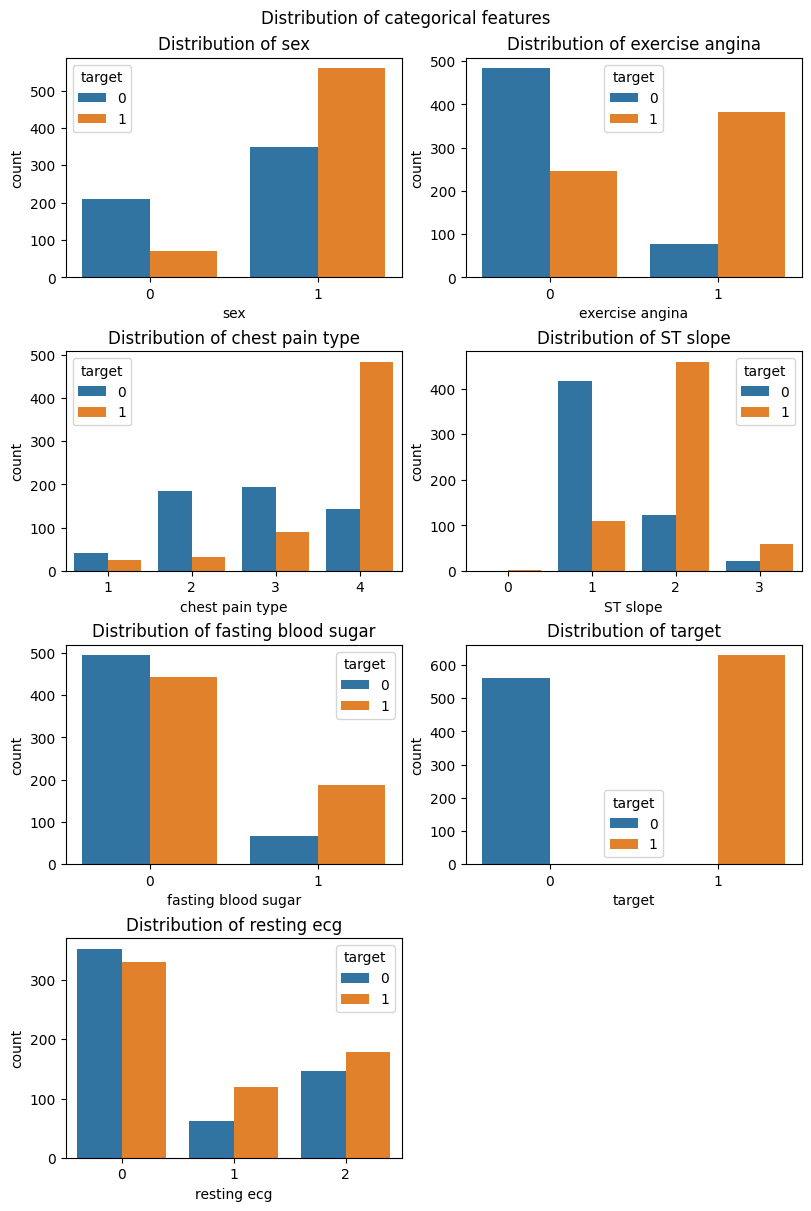

In [7]:
fig,axs = plt.subplots(nrows=4,ncols=2, figsize=(8,12), layout="constrained") #create figure with axes of 3 rows and 2 columns
fig.delaxes(axs[3][1]) #delete the last axes object since the total number of features are 5
plot=0 #to select the feature name in the list of categorical features
for i in range(0,3): #to generate column numbers
  for j in range(0,4): #row generate row numbers
    if plot < 7:
      ax_=axs[j][i] #assign axes object at the current row and column
      sns.countplot(x=main_data.loc[:,cat_type[plot]],hue=main_data["target"],ax=ax_)
      ax_.set_title(f"Distribution of {cat_type[plot]}")
      plot = plot+1 #increase count of plot
fig.suptitle("Distribution of categorical features") #figure title
plt.show()

From the above charts we can observe a considerable disparity on the protected characteristics, which may lead to considerable amount of bias

<h4> Distribution of Sex and target target variable  </h4>

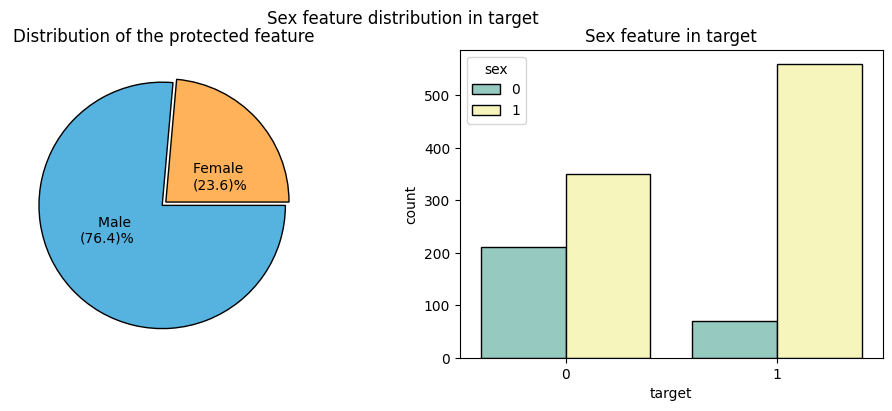

In [8]:
#Plot barchart of distribution of sex feature and sex feature with target.
fig, axs = plt.subplots(1,2, figsize=(12,4))

#sex feature
percent_no_f = round(((main_data["sex"].value_counts()[0]*100)/main_data.shape[0]),1)
percent_yes_m = round(((main_data["sex"].value_counts()[1]*100)/main_data.shape[0]),1)
axs[0].pie([percent_no_f,percent_yes_m], labels=[f"Female \n({percent_no_f})%",f"Male \n({percent_yes_m})%"], 
           labeldistance=0.3, explode=[0.02,0.02], wedgeprops={"ec":"black"}, colors=["#FFB25A","#56B3E0"])
axs[0].set_title("Distribution of the protected feature")

#sex feature in target
sns.countplot(x=main_data["target"],hue =main_data["sex"],ax=axs[1], edgecolor="black", palette="Set3")
axs[1].set_title("Sex feature in target")

fig.suptitle("Sex feature distribution in target")
plt.show()

The above distribution of the classes of the protected shows that for the to total number of patients, the male gender makes up 76.4%, while the female gender makes up 23.6%. However, despite this disparity, the distribution of the sex gender in the target variable shows that the male gender has a high amount of Heart Disease compared to the female gender.

<h4>Outlier Investigation</h4>

Investigate Resting Blood Pressure

In [9]:
#investigate resting bps
main_data.sort_values(by="resting bp s")

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,0,0,0,155,0,1.5,2,1
315,53,1,4,80,0,0,0,141,1,2.0,3,0
228,38,1,4,92,117,0,0,134,1,2.5,2,1
694,39,0,3,94,199,0,0,179,0,0.0,1,0
834,51,1,3,94,227,0,0,154,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
366,64,0,4,200,0,0,0,140,1,1.0,2,1
1013,56,0,4,200,288,1,2,133,1,4.0,3,1
734,56,0,4,200,288,1,2,133,1,4.0,3,1
242,54,1,4,200,198,0,0,142,1,2.0,2,1


From the above it can be observed that one of the outliers in resting blood pressure is 0 which is unlikely for someone alive. Since the reason for this entry is unknown, it is better to drop it. 

In [10]:
main_data = main_data.drop(index=np.where(main_data["resting bp s"]==0)[0])
main_data.sort_values(by="resting bp s")

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
315,53,1,4,80,0,0,0,141,1,2.0,3,0
228,38,1,4,92,117,0,0,134,1,2.5,2,1
834,51,1,3,94,227,0,0,154,1,0.0,1,0
694,39,0,3,94,199,0,0,179,0,0.0,1,0
1018,51,1,3,94,227,0,0,154,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,54,1,4,200,198,0,0,142,1,2.0,2,1
734,56,0,4,200,288,1,2,133,1,4.0,3,1
366,64,0,4,200,0,0,0,140,1,1.0,2,1
1013,56,0,4,200,288,1,2,133,1,4.0,3,1


Distribution of resting blood pressure after dropping outlier of 0

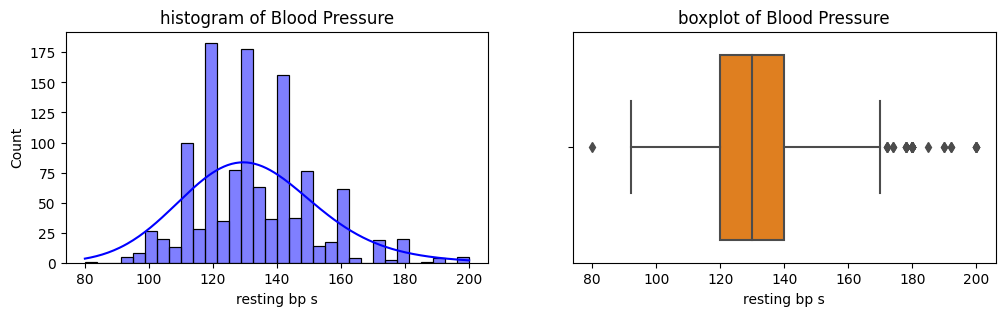

In [11]:
fig, axs = plt.subplots(1,2,figsize=(12,3))
#histogram
sns.histplot(main_data["resting bp s"], kde=True, kde_kws ={"bw_adjust":3}, ax=axs[0], color="Blue")
axs[0].set_title("histogram of Blood Pressure")
#boxplot
sns.boxplot(x=main_data["resting bp s"],ax=axs[1],palette="Set1_r")
axs[1].set_title("boxplot of Blood Pressure")
plt.show()

Investigate cholesterol Feature

In [12]:
main_data.sort_values(by="cholesterol")

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
398,58,1,4,170,0,1,1,105,1,0.0,2,1
373,63,1,4,185,0,0,0,98,1,0.0,1,1
372,66,1,4,150,0,0,0,108,1,2.0,2,1
371,60,1,4,135,0,0,0,63,1,0.5,1,1
370,63,1,4,150,0,0,0,86,1,2.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30,53,1,3,145,518,0,0,130,0,0.0,2,1
76,32,1,4,118,529,0,0,130,0,0.0,2,1
618,67,0,3,115,564,0,2,160,0,1.6,2,0
1039,67,0,3,115,564,0,2,160,0,1.6,2,0


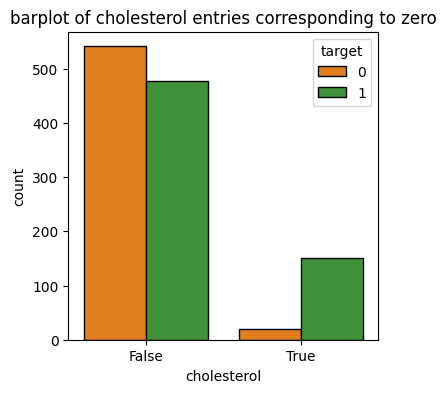

In [13]:
#bar plot showing the cholesterol feature equal to zero 
fig,ax=plt.subplots(figsize=(4,4))
sns.countplot(x=main_data["cholesterol"]==0, hue=main_data["target"], edgecolor="black", palette="Paired_r", ax=ax)
ax.set_title("barplot of cholesterol entries corresponding to zero")
plt.show()

In [14]:
#create dataframe of observations with cholesterol value of 0
chol_zero = main_data[main_data["cholesterol"]==0]
chol_zero.shape

(171, 12)

There are 171 observations corresponding to  cholesterol entries of zero. This is a significant amount of information, however, the feature will be kept as not much information is known about the entry

<h4>Correlation of all the features</h4>

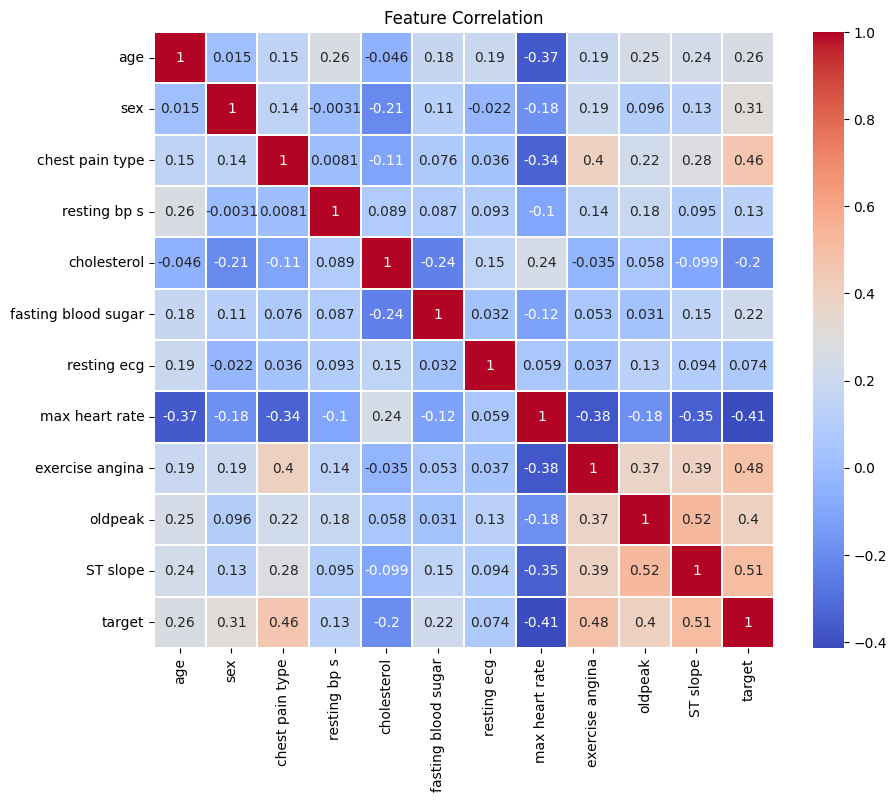

In [15]:
#Correlation of Numerical Features. 
corr_num = main_data.corr()

#plot heatmap of correlation
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_num, annot=True, cmap="coolwarm", ax=ax,linewidth=0.1, linecolor="White")
ax.set_title("Feature Correlation")
plt.show()

From the above correlation matrix it can be observed that all features have a reasonable correlation with the target feature except resting ecg and resting bps, and a moderate correlation between "oldpeak" and "ST slope" feature. 

<h4> Split the dependent and target feature   </h4>


In [16]:
#copy to a new data frame
X = main_data.copy()

#copy the target feature to series
Y = X.pop("target")

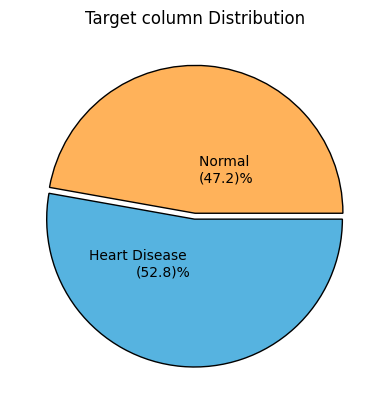

In [17]:
#Calculate percentage of distribution
percent_no_Y = round(((Y.value_counts()[0]*100)/len(Y)),1)
percent_yes_Y = round(((Y.value_counts()[1]*100)/len(Y)),1)

#Visualize Distribution of the Attrition Colums
#piechart
plt.pie([percent_no_Y,percent_yes_Y], labels=[f"Normal \n({percent_no_Y})%",f"Heart Disease \n({percent_yes_Y})%"], labeldistance=0.3,
       wedgeprops={"ec":"black"}, colors=["#FFB25A","#56B3E0"], explode=[0.02,0.02])
plt.title("Target column Distribution")
plt.show()


 It can observed that the target class is slightly imbalanced with Normal readings having 47.1% as opposed to readings with Heart Disease at 52.9%. However, to ensure that the model has adequate support for the Normal readings and increase the recall and precision of Normal readings, a sample weight of ratio 1:1.123 for Heart Disease and Normal readings respectively will be applied when the model is being fitted to the training set.

<h2 style = "text-align:center"> MODEL DEVELOPMENT</h2>

<h4> Create Train Test split and Normalize</h4>


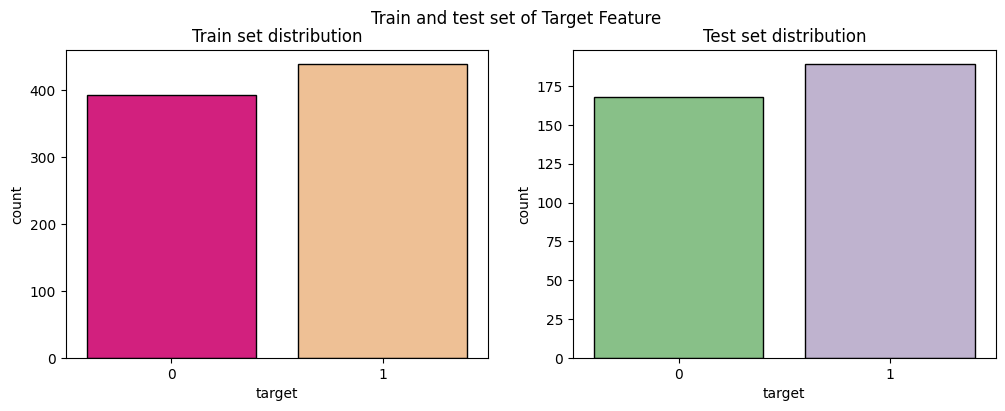

In [18]:
#split Data into train and test set
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state=41, stratify=Y)

#fit transformer to Normalize train set 
mm = MinMaxScaler().fit(X_train)
X_train_t = mm.transform(X_train)
#normalize test set
X_test_t = mm.transform(X_test)

#Plot barchart of target feature train and test set to visualize distribution.
fig, axs = plt.subplots(1,2, figsize=(12,4))

#barchart of target feature before resampling
sns.countplot(x=Y_train, ax=axs[0], palette ="Accent_r",edgecolor="black")
axs[0].set_title("Train set distribution")

#barchart of target feature after resampling
sns.countplot(x=Y_test,ax=axs[1], palette ="Accent",edgecolor="black")
axs[1].set_title("Test set distribution")

fig.suptitle("Train and test set of Target Feature")
plt.show()



<h4> Evaluate A Gradient Boosting Classifier model on train set using cross validation </h4>


In [24]:
#A dictionary of custom scores to pass to the cross validation.
scoring_ = {
    "f1_micro":"f1_micro",
    "precision": "precision",
    "recall": "recall",
    "accuracy": "accuracy"
}

#Assigning a sample weight to each target class
sample_weight_ = []
for val in Y_train:
    if val==0:
        sample_weight_.append(1.123)
    else:
        sample_weight_.append(1)

#Gradient Boosting Classifier
gb_1 = SVC(random_state=42, kernel="linear")

#Using 5 K-Fold stratified cross validation to score model performance on train set
cv_score_gb_1 = cross_validate(gb_1, X_train, Y_train, scoring=scoring_, cv=5, fit_params={"sample_weight":sample_weight_})
cv_1=pd.DataFrame(cv_score_gb_1)
cv_1.head()

,fit_time,score_time,test_f1_micro,test_precision,test_recall,test_accuracy
0,2.223690,0.010684,0.802395,0.831325,0.784091,0.802395
1,2.829849,0.012375,0.826347,0.824176,0.852273,0.826347
2,3.392002,0.010495,0.819277,0.862500,0.784091,0.819277
3,5.064570,0.010349,0.807229,0.825581,0.806818,0.807229
4,10.056876,0.010345,0.843373,0.850575,0.850575,0.843373


In [33]:
#mean score of the different folds.
cv_1.describe().loc["mean",:]

fit_time          4.713398
score_time        0.010849
test_f1_micro     0.819724
test_precision    0.838831
test_recall       0.815569
test_accuracy     0.819724
Name: mean, dtype: float64

<h4>Fit and run Prediction on test set <h4>

In [25]:
#apply the sample weight to address the class imbalance
gb_1.fit(X_train_t,Y_train,sample_weight_)
y_pred = gb_1.predict(X_test_t)


======classification report======
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       176
           1       0.83      0.87      0.85       181

    accuracy                           0.84       357
   macro avg       0.84      0.84      0.84       357
weighted avg       0.84      0.84      0.84       357



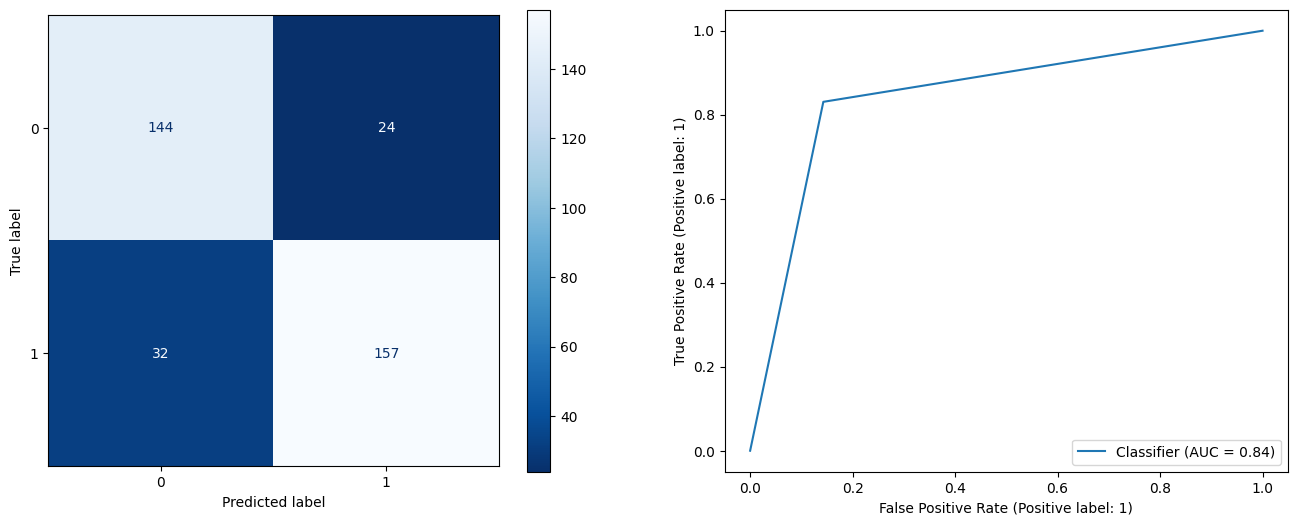

In [26]:
#print classification score
print("======classification report======")
rep_1 = classification_report(y_pred, Y_test)
print(rep_1)

#create axes to plot ROC and confusion matrix
fig, axs = plt.subplots(1,2,figsize=(16,6))
#plot confusion matrix of the values
confusion_matrix_gb_1= (confusion_matrix( Y_test,y_pred, labels=gb_1.classes_))
disp_gb_1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_gb_1, display_labels=gb_1.classes_)
disp_gb_1.plot(cmap="Blues_r", ax=axs[0])

#plot Receiver Operator Curve
RocCurveDisplay.from_predictions(Y_test,y_pred, ax=axs[1])
plt.show()

<h3 style="text-align:center">Model Evaluation using Appropriate Fairness Criteria based on the "sex" which is the protected characteristics<h3>

Split the True and Predicted Target Values into male and female class

In [42]:
m_indices = np.where(X_test["sex"]==1)
f_indices = np.where(X_test["sex"]==0)

print(X_test["sex"].value_counts())
print(f"male indices total: {len(m_indices[0])}")
print(f"female indices total: {len(f_indices[0])}")


sex
1    271
0     86
Name: count, dtype: int64
male indices total: 271
female indices total: 86


split the actual outcome to male and female

In [41]:
#Actual target outcome
y_actual_m = [Y_test.values[i] for i in m_indices]
y_actual_f = [Y_test.values[i] for i in f_indices]

#Predicted outcome
y_pred_m = [y_pred[i] for i in m_indices ]
y_pred_f = [y_pred[i] for i in f_indices ]

#convert list to np array and flatten
y_pred_m = np.array(y_pred_m).ravel()
y_actual_m = np.array(y_actual_m).ravel()
y_pred_f = np.array(y_pred_f).ravel()
y_actual_f = np.array(y_actual_f).ravel()

Compute confusion and Matrix and performance score for both male and female classes.

In [38]:
#confusion matrix for male
cm_m = confusion_matrix(y_actual_m, y_pred_m)
disp_cm_m = ConfusionMatrixDisplay(cm_m, display_labels=gb_1.classes_)
tn_m, fp_m, fn_m, tp_m = cm_m.ravel()

#confusion matrix for female
cm_f = confusion_matrix(y_pred_f, y_actual_f)
disp_cm_f = ConfusionMatrixDisplay(cm_f, display_labels=gb_1.classes_)
tn_f, fp_f, fn_f, tp_f = cm_f.ravel()

#calculate performance metrics for male
accuracy_m = round(accuracy_score(y_actual_m, y_pred_m),2)
recall_m = round(recall_score(y_actual_m, y_pred_m),2)
positive_rate_m =  round((fp_m+tp_m)/(tn_m+fp_m+fn_m+tp_m),2)

#calculate performance metrics for female
accuracy_f = round(accuracy_score(y_actual_f, y_pred_f),2) 
recall_f = round(recall_score(y_actual_f, y_pred_f),2) 
positive_rate_f = round((fp_f+tp_f)/(tn_f+fp_f+fn_f+tp_f),2) 

In [37]:
#Create DataFrame of fairness criteria
fairness_criteria = pd.DataFrame([[accuracy_m,recall_m,positive_rate_m],[accuracy_f,recall_f,positive_rate_f]], 
                                       columns=["Equal Accuracy", "Equal Opportunity", "Group Fairness"], index=["male", "female"])
fairness_criteria.head()

,Equal Accuracy,Equal Opportunity,Group Fairness
male,0.83,0.85,0.61
female,0.88,0.67,0.24


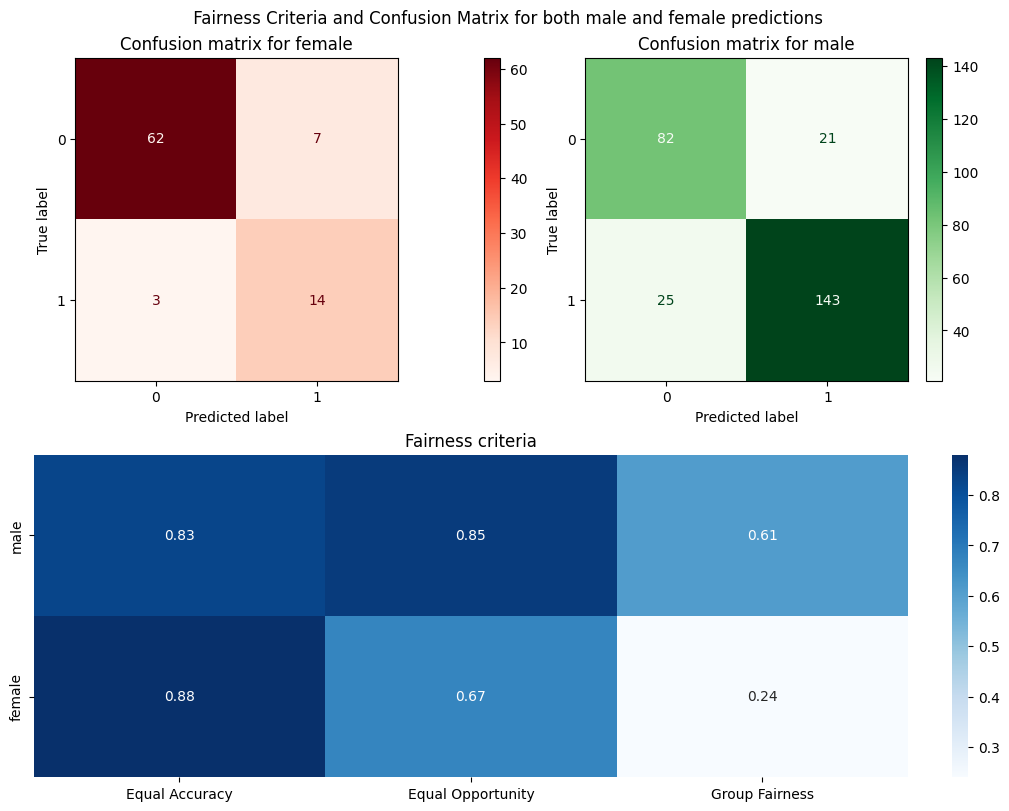

In [43]:
#Confusion Matrix for both male and female predictions.
fig = plt.figure(layout="constrained", figsize=(10,8))
gs = GridSpec(2,2,figure=fig)

#Confusion matrix for female predictions
disp_cm_f = ConfusionMatrixDisplay(cm_f, display_labels=gb_1.classes_)
ax1=fig.add_subplot(gs[0,0])
ax1.set_title("Confusion matrix for female")
disp_cm_f.plot(ax= ax1,  cmap="Reds")

    
#Confusion matrix for female predictions
disp_cm_m = ConfusionMatrixDisplay(cm_m, display_labels=gb_1.classes_)
ax2=fig.add_subplot(gs[0,1])
ax2.set_title("Confusion matrix for male")
disp_cm_m.plot(ax=ax2, cmap="Greens")

#Confusion Matrix to Display the Fairness Criteria
ax3=fig.add_subplot(gs[1,:])
sns.heatmap(fairness_criteria, annot = True, cmap="Blues", ax=ax3)
ax3.set_title("Fairness criteria")
fig.suptitle(" Fairness Criteria and Confusion Matrix for both male and female predictions")
plt.show()





The above figures display a considerable bias in the model in regards to Equal Accuracy, Equal Opportunity, and Group Fairness. 

<h2 style = "text-align:center"> BIAS MITIGATION ATTEMPT USING RESAMPLING OF THE PROTECTED FEATURE</h2>

Resample the sex feature

In [ ]:
X_resample = X_train.join(Y_train)
X_resample

In [ ]:
X_resample = X_train.join(Y_train)
X_resample,sex = KMeansSMOTE().fit_resample(X_resample, X_resample["sex"])
Y_resample = X_resample.pop("target")

Show Distribution of sex before and after sampling

In [ ]:
#Plot barchart of distribution of sex feature and sex feature with target.
fig, axs = plt.subplots(2,2, figsize=(12,10))

#sex feature
percent_no_f = round(((X_train["sex"].value_counts()[0]*100)/X_train.shape[0]),1)
percent_yes_m = round(((X_train["sex"].value_counts()[1]*100)/X_train.shape[0]),1)
axs[0][0].pie([percent_no_f,percent_yes_m], labels=[f"Female \n({percent_no_f})%",f"Male \n({percent_yes_m})%"], 
           labeldistance=0.3, explode=[0.02,0.02], wedgeprops={"ec":"black"}, colors=["#FFB25A","#56B3E0"])
axs[0][0].set_title("Distribution of the protected feature")

#sex feature in target
sns.countplot(x=Y_train,hue =X_train["sex"],ax=axs[0][1], edgecolor="black", palette="Set3")
axs[0][1].set_title("Sex feature in target")

#sex feature
percent_no_f = round(((X_resample["sex"].value_counts()[0]*100)/X_resample.shape[0]),1)
percent_yes_m = round(((X_resample["sex"].value_counts()[1]*100)/X_resample.shape[0]),1)
axs[1][0].pie([percent_no_f,percent_yes_m], labels=[f"Female \n({percent_no_f})%",f"Male \n({percent_yes_m})%"], 
           labeldistance=0.3, explode=[0.02,0.02], wedgeprops={"ec":"black"}, colors=["#106F3F","#A73571"])
axs[1][0].set_title("Distribution of the protected feature")

#sex feature in target
sns.countplot(x=Y_resample,hue =X_resample["sex"],ax=axs[1][1], edgecolor="black", palette="Set1")
axs[1][1].set_title("Sex feature in target")

fig.suptitle("Sex feature before and after resampling  in target")
plt.show()

In [ ]:
#Plot barchart of target feature train and test set to visualize distribution.
fig, axs = plt.subplots(1,2, figsize=(12,4))

#Calculate percentage of target distribution before resampling
percent_no_Y_1 = round(((Y.value_counts()[0]*100)/len(Y)),1)
percent_yes_Y_1 = round(((Y.value_counts()[1]*100)/len(Y)),1)

#piechart of target column before resampling
axs[0].pie([percent_no_Y_1,percent_yes_Y_1], labels=[f"Normal \n({percent_no_Y_1})%",f"Heart Disease \n({percent_yes_Y_1})%"], labeldistance=0.3,
       wedgeprops={"ec":"black"}, colors=["#FFB25A","#56B3E0"], explode=[0.02,0.02])
axs[0].set_title("Target column Distribution before resampling")

#Calculate percentage of target distribution after resampling
percent_no_Y_2 = round(((Y_resample.value_counts()[0]*100)/len(Y_resample)),1)
percent_yes_Y_2 = round(((Y_resample.value_counts()[1]*100)/len(Y_resample)),1)

#piechart of target column after resampling
axs[1].pie([percent_no_Y_2,percent_yes_Y_2], labels=[f"Normal \n({percent_no_Y_2})%",f"Heart Disease \n({percent_yes_Y_2})%"], labeldistance=0.3,
       wedgeprops={"ec":"black"}, colors=["#FFB25A","#56B3E0"], explode=[0.02,0.02])
axs[1].set_title("Target column Distribution after reesampling")

fig.suptitle("Test distribution of target before and after resampling")
plt.show()

 It can be observed that the target class is considerably imbalanced after resampling the protected feature with Normal readings having 60.5% as opposed to readings with Heart Disease at 39.5%. A sample weight ratio of 1:1.53 for Normal and Heart Disease class respectively will be used make the support proportional

Fit and predict using resampled sets

In [ ]:
#transform the the resampled train set
X_resample_t = mm.transform(X_resample)

#determine the sample weight
sample_weight_2 = []
for val in Y_train:
    if val==0:
        sample_weight_.append(1)
    else:
        sample_weight_.append(1.53)
        
#fit the model
gb_2 = SVC(random_state=42)
gb_2.fit(X_resample_t,Y_resample,sample_weight_2)
y_pred_2 = gb_2.predict(X_test_t)

Overall performance

In [44]:
#print classification score
print("======classification report======")
rep_2 = classification_report(y_pred_2, Y_test)
print(rep_2)
#create axes to plot ROC and confusion matrix
fig, axs = plt.subplots(1,2,figsize=(16,6))
#plot confusion matrix of the values
confusion_matrix_gb_2= (confusion_matrix( Y_test,y_pred_2, labels=gb_2.classes_))
disp_gb_2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_gb_2, display_labels=gb_2.classes_)
disp_gb_2.plot(cmap="Oranges", ax=axs[0])

#plot Receiver Operator Curve
RocCurveDisplay.from_predictions(Y_test,y_pred_2, ax=axs[1])
plt.show()

======classification report======


NameError: name 'y_pred_2' is not defined

<h4> Evaluation using fairness criteria after resampling the target</h4>

In [ ]:
#split using protected characteristics
m_indices_1 = np.where(X_test["sex"]==1)
f_indices_1 = np.where(X_test["sex"]==0)

#Actual target outcome
y_actual_m_1 = [Y_resample.values[i] for i in m_indices_1]
y_actual_f_1 = [Y_resample.values[i] for i in f_indices_1]

#Predicted outcome
y_pred_m_1 = [y_pred_2[i] for i in m_indices_1 ]
y_pred_f_1 = [y_pred_2[i] for i in f_indices_1 ]

#convert list to np array and flatten
y_pred_m_1 = np.array(y_pred_m_1).ravel()
y_actual_m_1 = np.array(y_actual_m_1).ravel()
y_pred_f_1 = np.array(y_pred_f_1).ravel()
y_actual_f_1 = np.array(y_actual_f_1).ravel()

#confusion matrix for male
cm_m_1 = confusion_matrix(y_actual_m_1, y_pred_m_1)
disp_cm_m_2 = ConfusionMatrixDisplay(cm_m_1, display_labels=gb_2.classes_)
tn_m_1, fp_m_1, fn_m_1, tp_m_1 = cm_m_1.ravel()

#confusion matrix for female
cm_f_1 = confusion_matrix(y_pred_f_1, y_actual_f_1)
disp_cm_f_1 = ConfusionMatrixDisplay(cm_f_1, display_labels=gb_2.classes_)
tn_f_1, fp_f_1, fn_f_1, tp_f_1 = cm_f_1.ravel()

#calculate performance metrics for male
accuracy_m_1 = round(accuracy_score(y_actual_m_1, y_pred_m_1),2)
recall_m_1 = round(recall_score(y_actual_m_1, y_pred_m_1),2)
positive_rate_m_1 =  round((fp_m_1+tp_m_1)/(tn_m_1+fp_m_1+fn_m_1+tp_m_1),2)

#calculate performance metrics for female
accuracy_f_1 = round(accuracy_score(y_actual_f_1, y_pred_f_1),2) 
recall_f_1 = round(recall_score(y_actual_f_1, y_pred_f_1),2) 
positive_rate_f_1 = round((fp_f_1+tp_f_1)/(tn_f_1+fp_f_1+fn_f_1+tp_f_1),2) 

#Create DataFrame of fairness criteria
fairness_criteria_1 = pd.DataFrame([[accuracy_m_1,recall_m_1,positive_rate_m_1],[accuracy_f_1,recall_f_1,positive_rate_f_1]], 
                                       columns=["Equal Accuracy", "Equal Opportunity", "Group Fairness"], index=["male", "female"])
fairness_criteria_1.head()

In [ ]:
#Confusion Matrix for both male and female predictions.
fig = plt.figure(layout="constrained", figsize=(10,8))
gs = GridSpec(2,2,figure=fig)

#Confusion matrix for female predictions
disp_cm_f_1 = ConfusionMatrixDisplay(cm_f_1, display_labels=gb_1.classes_)
ax1=fig.add_subplot(gs[0,0])
ax1.set_title("Confusion matrix for female")
disp_cm_f_1.plot(ax= ax1,  cmap="Reds")

    
#Confusion matrix for female predictions
disp_cm_m_1 = ConfusionMatrixDisplay(cm_m_1, display_labels=gb_1.classes_)
ax2=fig.add_subplot(gs[0,1])
ax2.set_title("Confusion matrix for male")
disp_cm_m_1.plot(ax=ax2, cmap="Greens")

#Confusion Matrix to Display the Fairness Criteria
ax3=fig.add_subplot(gs[1,:])
sns.heatmap(fairness_criteria_1, annot = True, cmap="Blues", ax=ax3)
ax3.set_title("Fairness criteria")
fig.suptitle(" Fairness Criteria and Confusion Matrix for both male and female predictions")
plt.show()